- Spatial operations use pixels in a neighbourhood to determine the present pixel value. Some application include filtering and sharpening. They are used in many steps in computer vision such as segmentation.
- Linear filtering
  - filtering Noise
  - Gaussian Blur
  - Image Sharpening
- Edges
- Median


In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [2]:
def plot_image(image_1,image_2,title_1='original',title2='New Image'):
    plt.figure(figsize=(10,10))
    plt.subplot(1,2,1)
    plt.imshow(image_1)
    plt.title(title_1)
    plt.subplot(1,2,2)
    plt.imshow(image_2)
    plt.title(title2)
    plt.show()

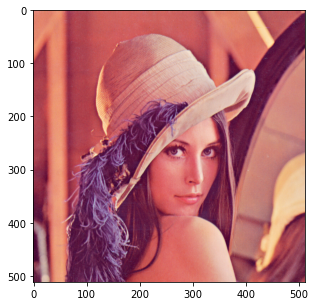

In [3]:
#loads the image from the specified file
image=Image.open('lenna.png')
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

- The image we are looking we are working with are comprised of RGB values, which are values from 0 to 255. zero means white noise, this make image look grainy.


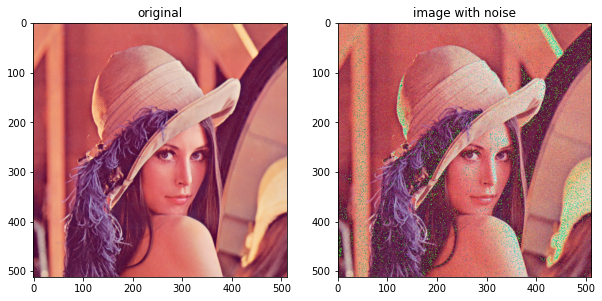

In [4]:
#get the no of rows and columns in the image
rows,cols=image.size
#create values using a normal distribution with a mean of 0 and standard deviation of 15, the values are converted to uint8 which means the value are between 0 to 255

noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
#Add the noise to the image
noisy_image=image+noise
#creates a PIl Image from an array
noisy_image=Image.fromarray(noisy_image)
#plot the original image and the image with the noise using the function defined at top
plot_image(image,noisy_image,'original','image with noise')

- When adding noise to an image sometimes the value might be greater than 255,in this case 256, is substracted from the value wrap the number around keeping it between 0 to 255. For example consider an image with an RGB value of 137 and we add noise with an RGB valie of 215 to ger an RGB value of 352.we then subtract 256, the total number of possible values between 0 to 255 , to get a number between 0 to 255
### Filtering Noise
- To be able to create customer kernels and use predefined filters we must import the Imaage Filtermodule from PIL

In [5]:
from PIL import ImageFilter

- smooting filters average out the pixels within a neighbourhood, they are sometimes called low pass filter.for mean filterin, the kernel simply averages out the kernels in a neighbourhood.


In [6]:
#create a kernel which is a 5 by 5 array where each value is 1/36
kernel=np.ones((5,5))/36
#create a ImageFilter kernel by providing the kernel size and a flatten kernel.
kernel_filter=ImageFilter.Kernel((5,5),kernel.flatten())

In [7]:
# Filters the images using the kernel
image_filtered = noisy_image.filter(kernel_filter)

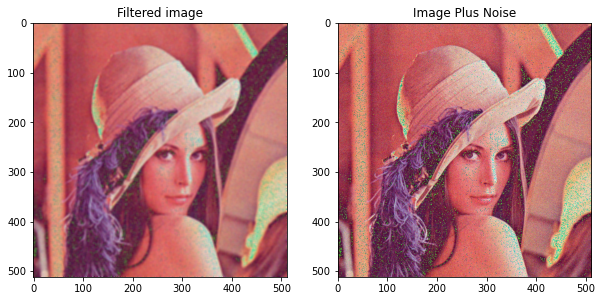

In [8]:
# Plots the Filtered and Image with Noise using the function defined at the top
plot_image(image_filtered, noisy_image,"Filtered image","Image Plus Noise")

- A smaller kernel keeps the image sharp, but filters less noise, here we try a 3x3 kernel. You can see her shoulders are sharper in this image but the green noise is brighter than the filtered image above.

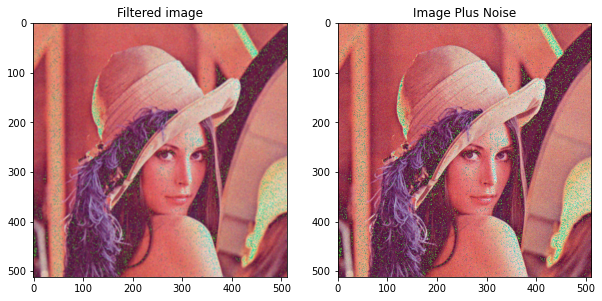

In [9]:
# Create a kernel which is a 3 by 3 array where each value is 1/36
kernel=np.ones((3,3))/36
#create a ImageFilter kernel by providing the kernel size and a flatten kernel.
kernel_filter=ImageFilter.Kernel((3,3),kernel.flatten())
#filters the images using the kernel
image_filtered=noisy_image.filter(kernel_filter)
#plot the filterd and noisy image
plot_image(image_filtered, noisy_image,"Filtered image","Image Plus Noise")

### Gausian Blur
- To perform Gaussian Blue we use the filter function on an image using the predefined filter ImageFilter.GaussianBlur
  - parameres
      - radius: blur kernel radius, default 2

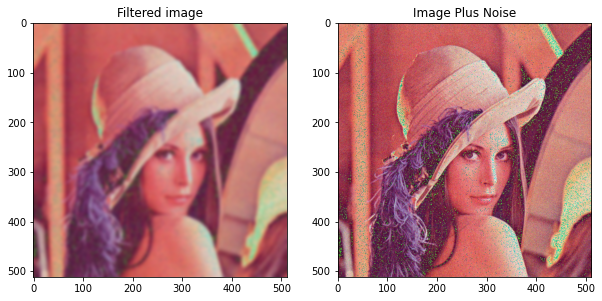

In [10]:
#filters the images using GaussianBlur
image_filtered=noisy_image.filter(ImageFilter.GaussianBlur(3))
plot_image(image_filtered, noisy_image,"Filtered image","Image Plus Noise")

### Image Sharpening
- Image sharpening involves smoothing the image and calculating the derivatives. we can accomplish image sharpening by appling the following kernel.

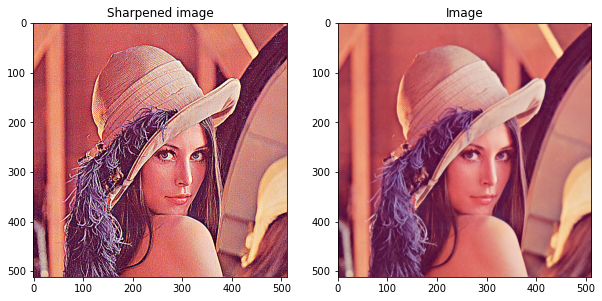

In [13]:
# Common Kernel for image sharpening
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
# Applys the sharpening filter using kernel on the original image without noise
sharpened = image.filter(kernel)
# Plots the sharpened image and the original image without noise
plot_image(sharpened , image, title_1="Sharpened image",title2="Image")

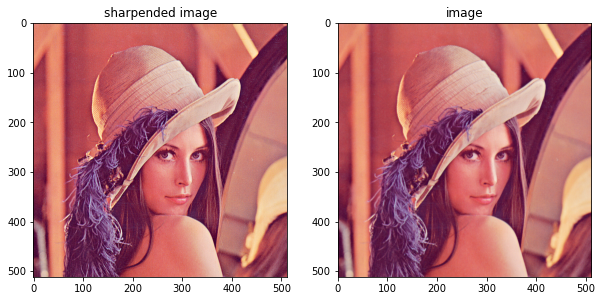

In [14]:
# we can also sharpen using a predefined filter
#shapepens image using predefined image filter from PIL
sharpened=image.filter(ImageFilter.SHARPEN)
#plots the sharpended image and the original image without noise
plot_image(sharpened,image,'sharpended image','image')

### Edges
- Edges are where pixels intensities change. The gradiwnt of function outputs the rate of change, we can approximate the gradient of a grayscale image with convolution.

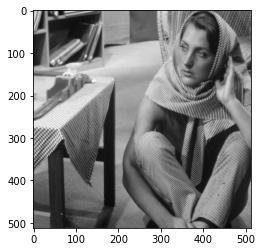

In [15]:
#loads the image from the specified file
image_gray=Image.open('barbara.png')
plt.imshow(image_gray,cmap='gray')

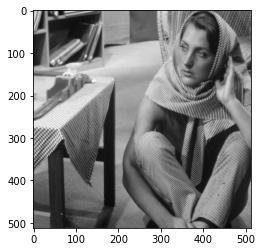

In [18]:
img_gray=image_gray.filter(ImageFilter.EDGE_ENHANCE)
#render the enhanced image
plt.imshow(image_gray,cmap='gray')

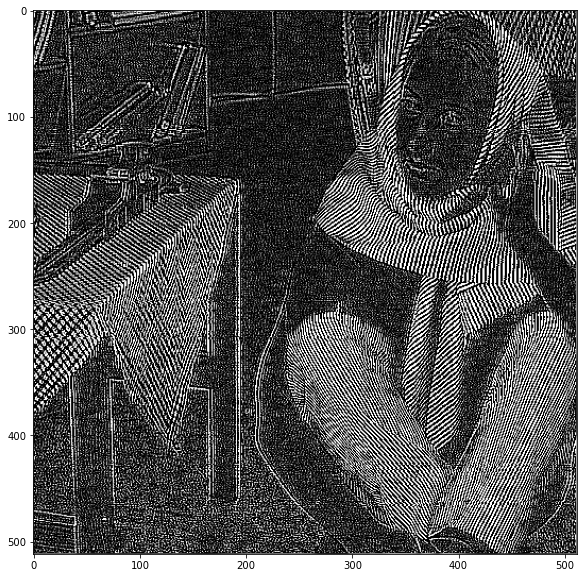

In [19]:
# Filters the images using FIND_EDGES filter
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
# Renders the filtered image
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')

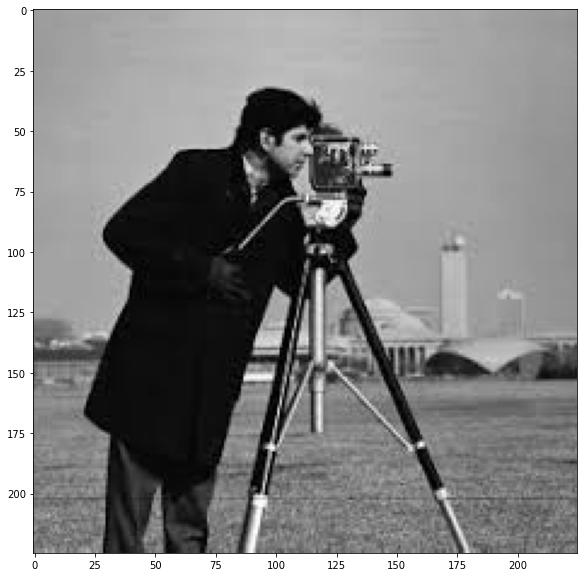

In [20]:
# Load the camera man image
image = Image.open("cameraman.jpeg")
# Make the image larger when it renders
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")

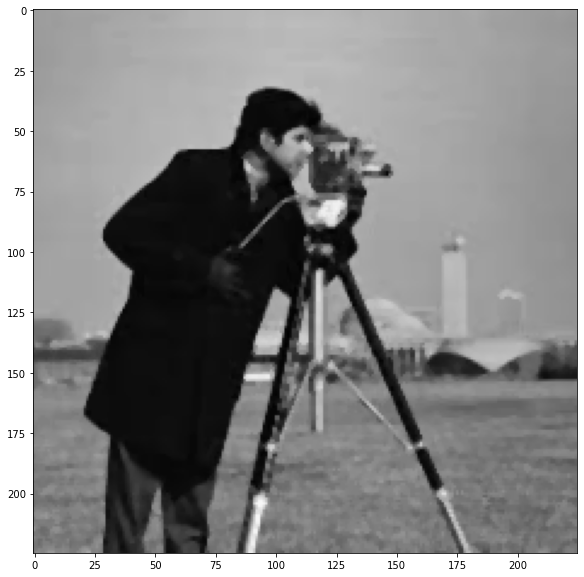

In [21]:
image = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
# Renders the image
plt.imshow(image,cmap="gray")